# Proyecto #3

## Descripción cuantitativa de un activo

Leer el archivo `Precios faang.xlsx` que contine precios históricos, seleccionar **dos acciones** y realizar un análisis comprarativo que contemple los siguientes aspectos:

- Graficar de la evolución de precios (utilizar subgráficos). CHECK
- Graficar precios normalizados en un mismo gráfico.
- Agregar una columna al DataFrame con los retornos diarios calculados a tasa contínua. CHECK
- Graficar la distribución empírica de los retonos diarios (utilizar subgráficos). CHECK
- Presentar un resumen de estadísticas de los retornos a tasa contínua. CHECK
- Imprimir la volatilidad anual y semestral (desvío standard) con leyendas que presenten los valores.
- Imprimir el coeficiente de curtosis. Utilizar leyendas para presentar los valores.
- Calcular y mostrar el VaR histórico diario con el 99% de confianza (porcentual).
- Calcular y mostrar el Expected Shortfall (ES) o VaR condicional (CVaR) histórico diario con el 99% de confianza (porcentual).

In [1]:
import pandas as pd
# colocamos las fechas como indices de los precios de accion 
df = pd.read_excel('Precios faang.xlsx', index_col=0, parse_dates=True)

In [23]:
# visualizamos los ultimos 5 datos del datframe 
df.tail()

,AAPL,AMZN,GOOG,META,NFLX,Retornos AAPL,Retornos AMZN,Retornos GOOG,Retornos META,Retornos NFLX
Date,,,,,,,,,,
2024-03-01,179.660004,178.220001,138.080002,502.299988,619.340027,-0.603041,0.825983,-1.216195,2.483011,2.723420
2024-03-04,175.100006,177.580002,134.199997,498.190002,615.830017,-2.538126,-0.359106,-2.809969,-0.818233,-0.566734
2024-03-05,170.119995,174.119995,133.779999,490.220001,598.500000,-2.844095,-1.948421,-0.312964,-1.599791,-2.814091
2024-03-06,169.119995,173.509995,132.559998,496.089996,597.690002,-0.587820,-0.350333,-0.911946,1.197421,-0.135338
2024-03-07,169.000000,176.820007,135.240005,512.190002,608.510010,-0.070953,1.907678,2.021732,3.245380,1.810304


In [3]:
# calculamos los retornos para cada Ticker
for column in df:
    df['Retornos ' + column] = ((df[column] / df[column].shift(1)) - 1)*100

In [4]:
#df.tail()

,AAPL,AMZN,GOOG,META,NFLX,Retornos AAPL,Retornos AMZN,Retornos GOOG,Retornos META,Retornos NFLX
Date,,,,,,,,,,
2024-03-01,179.660004,178.220001,138.080002,502.299988,619.340027,-0.603041,0.825983,-1.216195,2.483011,2.723420
2024-03-04,175.100006,177.580002,134.199997,498.190002,615.830017,-2.538126,-0.359106,-2.809969,-0.818233,-0.566734
2024-03-05,170.119995,174.119995,133.779999,490.220001,598.500000,-2.844095,-1.948421,-0.312964,-1.599791,-2.814091
2024-03-06,169.119995,173.509995,132.559998,496.089996,597.690002,-0.587820,-0.350333,-0.911946,1.197421,-0.135338
2024-03-07,169.000000,176.820007,135.240005,512.190002,608.510010,-0.070953,1.907678,2.021732,3.245380,1.810304


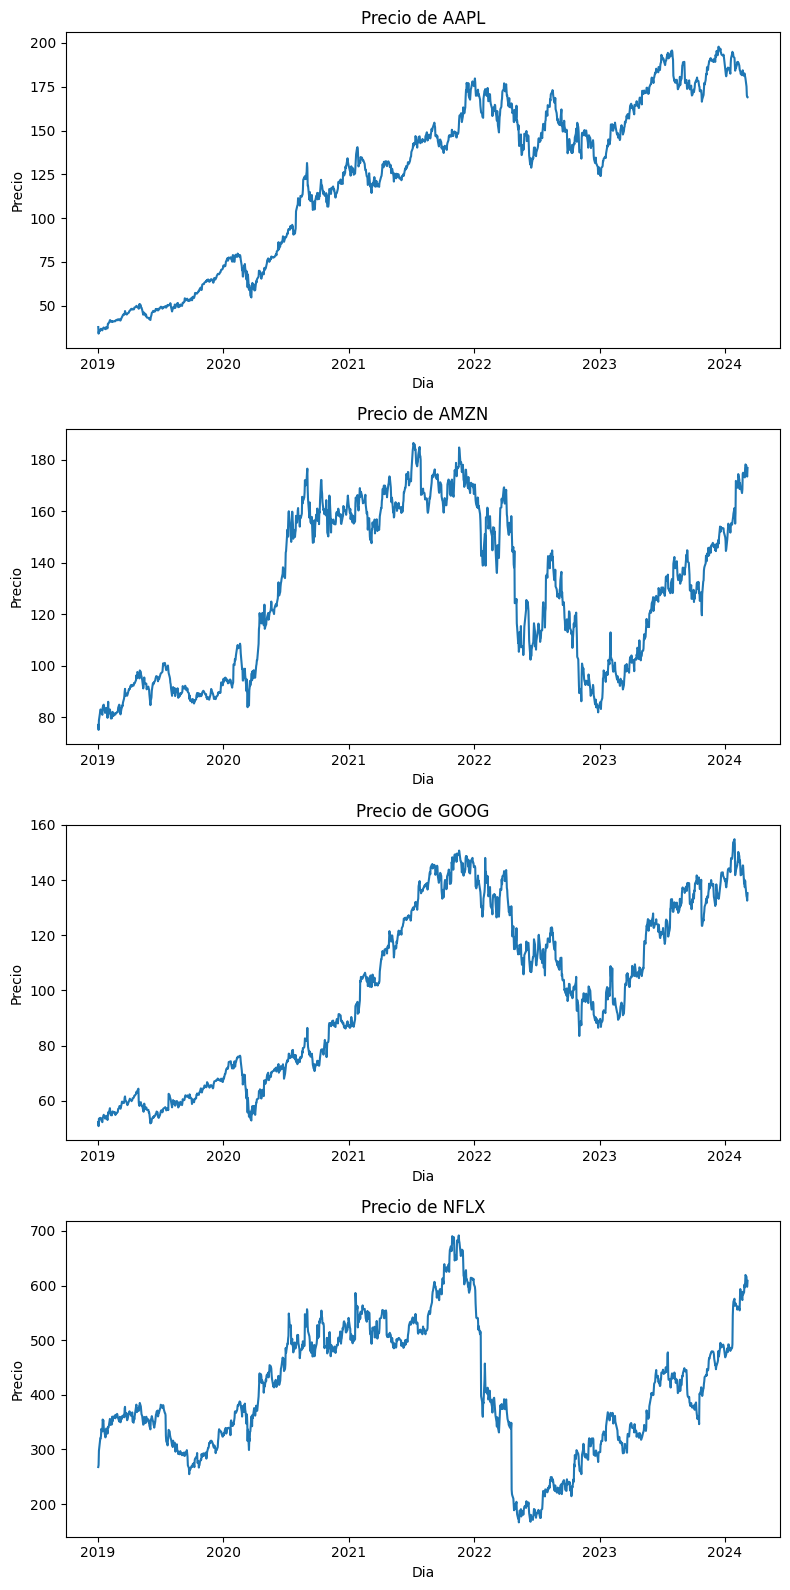

In [26]:
import matplotlib.pyplot as plt

# Lista de columnas que deseamos plotear
columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX']
num_cols = len(columns)

# Creamos los subplots
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, 4 * num_cols))

# hacemos un loop sobre cada columna 
for i, col in enumerate(columns):
    # Plot the raw values of the column
    axes[i].plot(df[col])
    axes[i].set_title(f'Precio de {col}')
    axes[i].set_xlabel('Dia')
    axes[i].set_ylabel('Precio')

plt.tight_layout()
plt.show()

## Cálculo de retornos por acción

In [6]:
# guardamos los retornos en un nuevo dataframe para graficar las distribuciones de los mismos
retornos = df[['Retornos AAPL', 'Retornos AMZN', 'Retornos GOOG', 'Retornos NFLX']]

In [9]:
#retornos.tail()

## Gráfico de distribución de los retornos

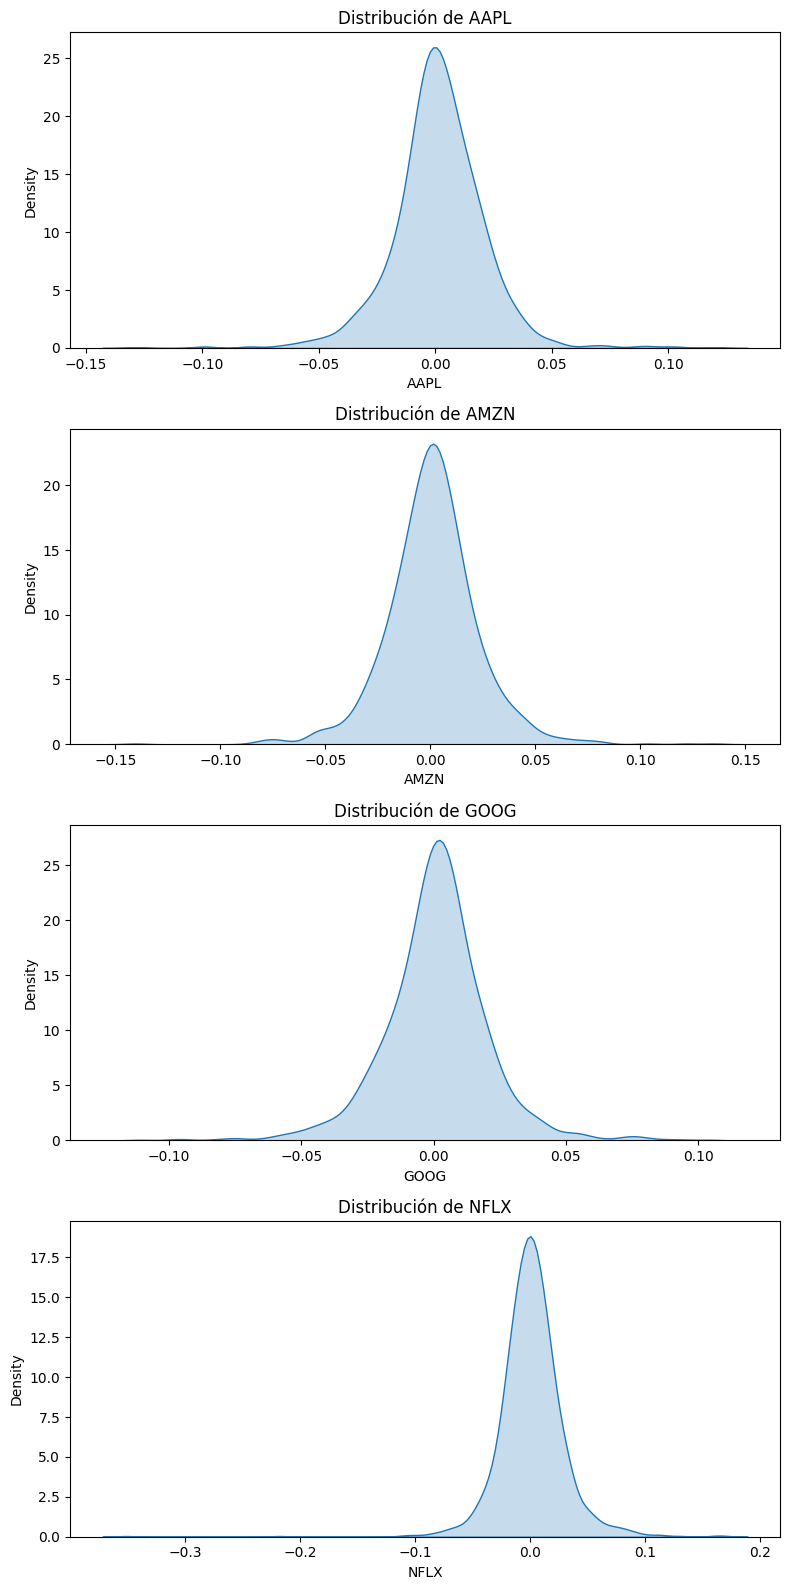

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# especificamos las columnas a utilizar
columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX']
num_cols = len(columns)
# utilizamos la funcion subplot de pyplot, pasamos como parametros el numero de fulas y el tamano de cada subplot
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, 4 * num_cols))
# hacemos un loop por cada Ticker y su correspondiente subplot
for i, col in enumerate(columns):
    # calculamos los retornos, llenando los NA con 0
    returns = df[col].pct_change().fillna(0)
    # usamos la kdeplot de seaborn
    sns.kdeplot(returns, fill=True, ax=axes[i])
    # colocamos el titulo de cada subplot
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

## Estadísticas descriptivas de los retornos

In [28]:
# Lista de las columnas a trabajar
columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX']

# usamos el metodo .describe() de la clase dataframe para obtener las estadisticas descriptivas
desc_stats = df[columns].describe()

# imprimimos
print(desc_stats)

              AAPL         AMZN         GOOG         NFLX
count  1304.000000  1304.000000  1304.000000  1304.000000
mean    123.644823   128.918381   100.286037   407.019141
std      47.398244    31.420649    30.744311   116.520526
min      34.075397    75.014000    50.803001   166.369995
25%      77.004440    95.933498    70.740498   323.557503
50%     134.698471   128.974998   102.189003   385.490005
75%     162.522827   158.877750   129.667881   499.634995
max     197.857529   186.570496   154.839996   691.690002
